<a href="https://colab.research.google.com/github/yohana143/INT248/blob/main/Hand_Written_digits_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip3 install keras-visualizer

In [33]:
from tensorflow import keras
#import keras
from keras import utils as np_utils
from keras_visualizer import visualizer
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as k
import matplotlib.pyplot as plt
import pandas as pd

#Importing the necessary libraries 

#Data Splitting

In [10]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [11]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [12]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

#Data Preprocessing

In [52]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [53]:
x_train.shape

(60000, 28, 28, 1)

#Since CNN accepts only binary values,we convert each class vector to binary class matrices

In [54]:
#y_train=keras.utils.to_categorical(y_train,10)
#x_test=keras.utils.to_categorical(y_test,10)

In [58]:
print("The y_train data is:\n\n",y_train)
print("\n")
print("The x_test data is:\n\n",x_test)

The y_train data is:

 [5 0 4 ... 5 6 8]


The x_test data is:

 [[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

In [59]:
x_train =x_train.astype("float32")
x_test=x_test.astype("float32")

In [60]:
x_train=x_train/255
x_test=x_test/255

In [61]:
x_train.shape

(60000, 28, 28, 1)

In [62]:
#Total training samples
x_train.shape[0]

60000

In [63]:
#Total testing samples
x_test.shape[0]

10000

#Building the model

In [66]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_16 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_14 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_7 (Flatten)         (None, 9216)              0         
                                                                 
 dense_14 (Dense)            (None, 256)               2359552   
                                                      

#Training the model

In [67]:
trained_model=model.fit(x_train,y_train,batch_size=128,epochs=20,verbose=1,validation_data=(x_test,y_test))
model.save('mnist.yohana')

Epoch 1/20
469/469 [==============================] - 9s 17ms/step - loss: 2.3016 - accuracy: 0.1111 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/20
469/469 [==============================] - 8s 16ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/20
469/469 [==============================] - 8s 16ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/20
469/469 [==============================] - 8s 17ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/20
469/469 [==============================] - 8s 16ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/20
469/469 [==============================] - 8s 16ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/20
469/469 [==============================] - 8s 16ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135

In [28]:
test_eval=model.evaluate(x_test,y_test, verbose=0)

In [68]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.04249578341841698
Test accuracy: 0.9926000237464905


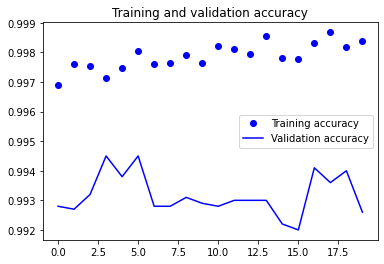

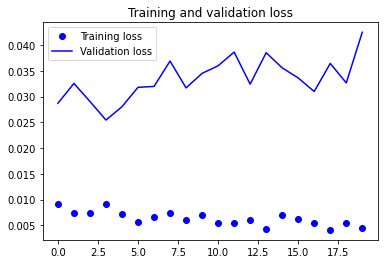

In [36]:
accuracy = trained_model.history['accuracy']
val_accuracy = trained_model.history['val_accuracy']
loss = trained_model.history['loss']
val_loss = trained_model.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()